# Regularización
---
### Regresión Lineal
22 de septiembre de 2016

In [50]:
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from random import random,randint,seed,sample
import matplotlib.pyplot as plt
import pandas as pda
import numpy as np
%matplotlib inline
from __future__ import division
seed(20160918)

In [51]:
df1 = pda.read_table("../datos_clase/regLinPoli.csv", sep=",", header = 0)
df1[:4]

,X,X2,X3,X4,X5,y
0,7.317938,53.552216,0.864389,0.859736,114,50.552216
1,1.284357,1.649574,0.108686,0.959256,115,2.649574
2,97.740652,9553.235089,1.990075,-0.344100,116,9643.235089
3,17.753591,315.190006,1.249286,-0.889370,117,310.190006


In [52]:
y1 = df1[:][df1.columns[5]]
x1 = df1[:][df1.columns[0:5]]

In [53]:
x1[:4]

,X,X2,X3,X4,X5
0,7.317938,53.552216,0.864389,0.859736,114
1,1.284357,1.649574,0.108686,0.959256,115
2,97.740652,9553.235089,1.990075,-0.344100,116
3,17.753591,315.190006,1.249286,-0.889370,117


Normalización de variables independientes

In [54]:
scalerx = preprocessing.StandardScaler().fit(x1)
x1_c = pda.DataFrame(scalerx.transform(x1))
x1_c[:4]

,0,1,2,3,4
0,-1.436023,-1.058662,-1.499078,1.215328,-1.730368
1,-1.648727,-1.076618,-3.170418,1.354193,-1.727002
2,1.751675,2.227799,0.990531,-0.464441,-1.723635
3,-1.068132,-0.968147,-0.647824,-1.225282,-1.720269


In [55]:
y1_c = (y1 - np.mean(y1))/np.var(y1)
y1_c[:4]

0   -0.000366
1   -0.000372
2    0.000781
3   -0.000335
Name: y, dtype: float64

In [56]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1_c, y1_c, train_size=0.75)

In [57]:
print len(x1_train)
print len(y1_train)

771
771


In [58]:
print len(x1_test)
print len(y1_test)

258
258


Función de regularización

In [59]:
def WsLinRegrRegular(wsinit, nu, lmbd, yvec, xmat):
    ws = np.asarray(wsinit)

    for reng in range(len(yvec)):
        # reng = 0
        xobsreng = np.asarray(xmat)[reng]
        yobsreng = np.asarray(yvec)[reng]
        # costo
        vx = ws[0] + np.sum(xobsreng*np.asarray(ws[1:]))
        error = (yobsreng - vx)
        # actualización de ws
        ws[0] = ws[0] + nu*error*1 - lmbd*(ws[0])
        for i in range(len(ws)-1):
            ws[i+1] = ws[i+1] + nu*error*xobsreng[i] - lmbd*(ws[i+1])
    return ws

In [76]:
def MseEst(wsact, xmat, yvec, lmbd):
    yfit = wsact[0] + np.dot(np.asarray(xmat), wsact[1:])
    mse = np.mean((yvec - yfit)**2) #+ sum(lmbd*(wsact)**2)
    return mse

In [77]:
def EstLambda(yvec, xmat):
    mselist = []
    lmbdavals = np.linspace(0, .05, 50)
    wslist = []
    for val in range(len( lmbdavals )):
        wsf = WsLinRegrRegular(
            wsinit = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 
            nu = .1, lmbd = lmbdavals[val],
            yvec = yvec, xmat = xmat)
        mseval = MseEst(wsact = wsf, xmat = xmat, yvec = yvec, lmbd = val)
        mselist.append(mseval)
        wslist.append(wsf)
            
    plt.plot(lmbdavals, mselist)
    
    return(lmbdavals, mselist, wslist)

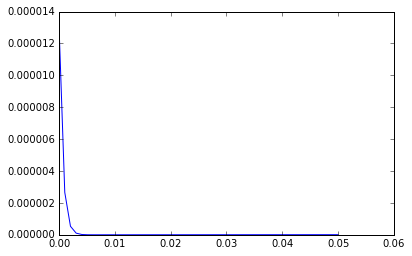

In [78]:
res_tra = EstLambda(yvec = y1_train, xmat = x1_train)

In [63]:
mse_test = []
for i in range(len(res_tra[1])):
    msecalc = MseEst(wsact = res_tra[2][i], 
                     xmat = x1_test, yvec = y1_test, 
                     lmbd = res_tra[0][i])
    mse_test.append(msecalc)

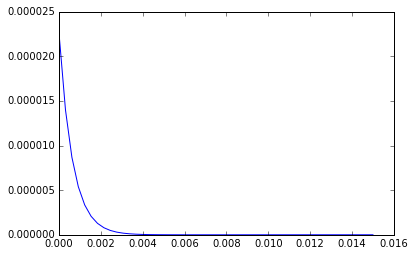

In [64]:
plt.plot(res_tra[0], mse_test)